In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#https://www.kaggle.com/dalpozz/creditcardfraud
df = pd .read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), 
                                                    df['Class'], test_size=0.30, 
                                                    random_state=101)

** Base accuracy **

In [6]:
(len(y_test) - sum(y_test)) /len(y_test)*100

99.831466591762933

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
predictions = logmodel.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve

In [12]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.999098814414
confusion matrix
 [[85280    19]
 [   58    86]]


## Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import subprocess


In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
predictions = dtree.predict(X_test)

In [18]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.99914562925
confusion matrix
 [[85259    40]
 [   33   111]]


## Random forrest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)


In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
predictions = rfc.predict(X_test)

In [16]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.999578666479
confusion matrix
 [[85293     6]
 [   30   114]]


In [17]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.95      0.79      0.86       144

avg / total       1.00      1.00      1.00     85443



In [18]:
rfc.feature_importances_

array([ 0.01471463,  0.01683157,  0.01476218,  0.01893662,  0.0288103 ,
        0.01158982,  0.01449808,  0.02427465,  0.01129339,  0.03753289,
        0.08166418,  0.06953241,  0.09302135,  0.01121052,  0.12124483,
        0.01363619,  0.06428316,  0.19827056,  0.02441524,  0.0119835 ,
        0.01091864,  0.01403108,  0.0090617 ,  0.00728022,  0.00852827,
        0.01011714,  0.02054885,  0.01514203,  0.01149687,  0.01036912])

Feature ranking:
1. feature 17 (0.198271)
2. feature 14 (0.121245)
3. feature 12 (0.093021)
4. feature 10 (0.081664)
5. feature 11 (0.069532)
6. feature 16 (0.064283)
7. feature 9 (0.037533)
8. feature 4 (0.028810)
9. feature 18 (0.024415)
10. feature 7 (0.024275)
11. feature 26 (0.020549)
12. feature 3 (0.018937)
13. feature 1 (0.016832)
14. feature 27 (0.015142)
15. feature 2 (0.014762)
16. feature 0 (0.014715)
17. feature 6 (0.014498)
18. feature 21 (0.014031)
19. feature 15 (0.013636)
20. feature 19 (0.011983)
21. feature 5 (0.011590)
22. feature 28 (0.011497)
23. feature 8 (0.011293)
24. feature 13 (0.011211)
25. feature 20 (0.010919)
26. feature 29 (0.010369)
27. feature 25 (0.010117)
28. feature 22 (0.009062)
29. feature 24 (0.008528)
30. feature 23 (0.007280)


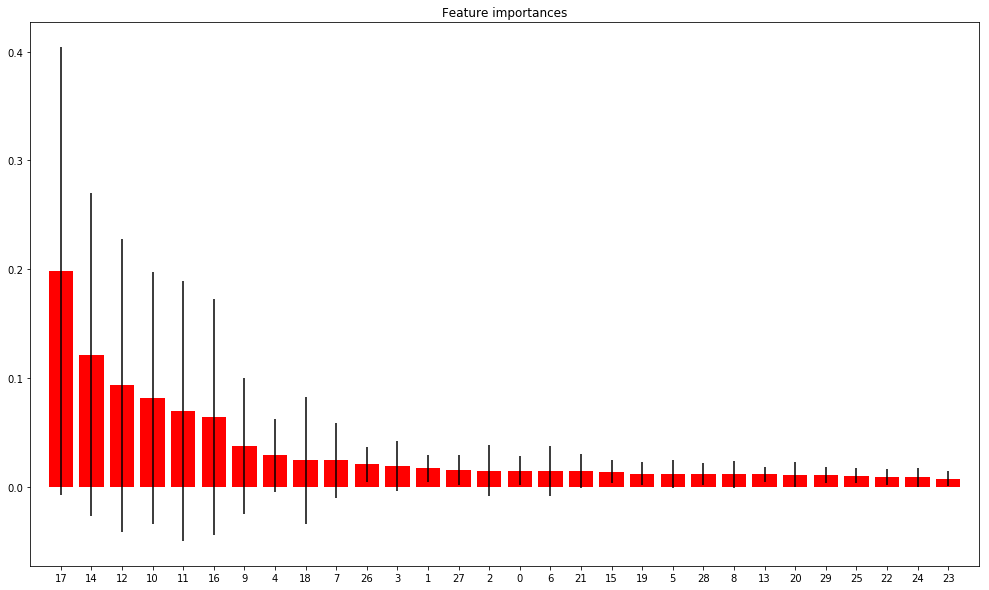

In [19]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(17,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()